Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your github nickname below:

In [1]:
NICKNAME = "Myza Alexander"

---

# Метод Монте-Карло в физике

Методами Монте-Карло называют множество различных методов в совершенно разных областях от физики до экономики. Основная суть этих методов заключается в использовании случайных величин для получения различных состояний исследуемой системы. 

Одно из частых применений метода Монте-Карло в физике состоит в расчете интегралов. При этом действительно полезным и незаменимым метод становится при работе с большим количеством измерений, когда построение обычных квадратур приводит к чересчур  огромным сеткам. Например, уже в случае 10 измерений, задание обычной равномерной решетки шириной в $2^4 = 16$ узлов, приводит к общей сетке размера $2^{40} \simeq 10^{12}$. Массив данных float такого размера будет занимать 4ТБ в памяти компьютера. Оперировать такими интегралами стандартными методами становится принципиально невозможно.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sp
plt.style.use('ggplot')

## Задание 1
Вычислим объем многомерной сферы в большом количестве измерений.

### Задание 1.1 
Напишите функцию, вычисляющую точный объем $d$-мерной сферы с помощью явного выражения. 
Объем многомерной сферы радиуса $R$ в $d$-измерениях дается формулой: 
$$
V_d = \frac{\pi^{d/2}} {\Gamma(1 + d/2)}
$$
где $\Gamma(x)$ - гамма функция, значение которой можно получить из scipy.special.

In [3]:
from scipy.special import gamma, factorial
def getSphereVolumeExact(D, R = 1.0):
    V = np.pi ** (D / 2) / gamma(1 + D / 2)
    return V

1. Проверьте результат для нескольких известных вам значений. 
2. Построите график V(D)

V 2-мерной сферы R=1 3.141592653589793, а рассчитанный - 3.141592653589793
V 3-мерной сферы R=1 4.1887902047863905, а рассчитанный - 4.188790204786391


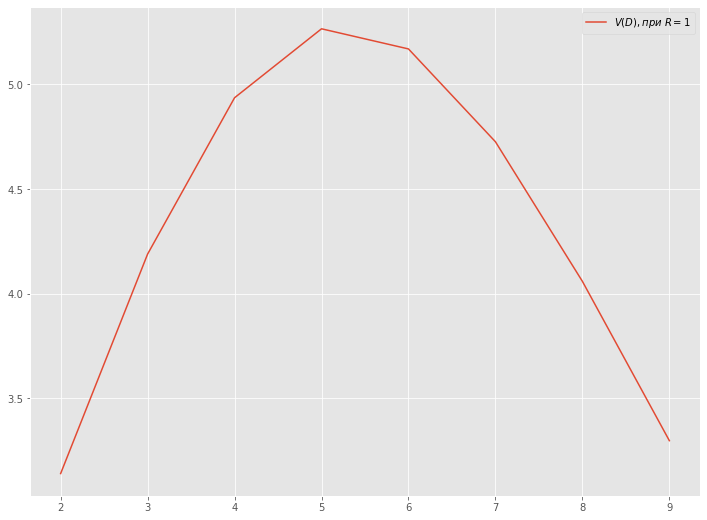

In [4]:
d_volume = {
            2: np.pi,
            3: 4 / 3 * np.pi
            }
for i in range(2, 4):
    print(f'V {i}-мерной сферы R=1 {d_volume[i]}, а рассчитанный - {getSphereVolumeExact(i)}')
D = np.arange(2, 10)
plt.figure(figsize=(12, 9))
plt.plot(D, getSphereVolumeExact(D), label=r'$V(D),при \ R = 1$')
plt.legend()

### Задание 1.2
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на псевдослучайных числах (используя, например `numpy.random.rand`).

In [5]:
def getSphereVolumePseudorandom(N: int, D: int, R = 1):
    def inside(v, r):
        return (v ** 2).sum() < r ** 2
    set_of_points = np.random.uniform(low = -R, high = R, size = (N_1, D))
    N_2 = np.count_nonzero([inside(set_of_points[i], R) for i in range(len(set_of_points))])
    Omega = (2 * R) ** D
    V = N_2 / N_1 * Omega
    return V

Постройте график зависимости относительной точности $\epsilon$ которая достигается при фиксированном $N$ от размерности сферы $D$. Для относительной точности используйте выражение $\epsilon = (V_{exact} - V_{random})/V_{exact}$.

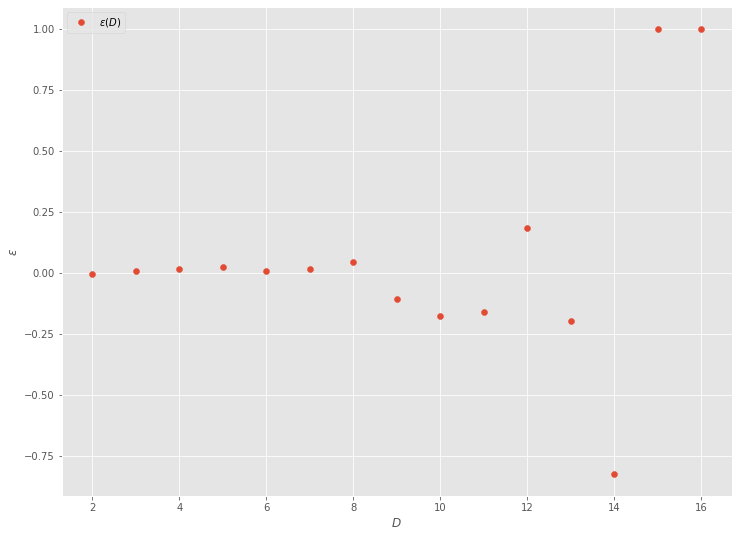

In [6]:
N_1 = 15000
D = np.arange(2, 17)
eps_2 = []
for d in D:
    eps = 1 - getSphereVolumePseudorandom(N_1, d) / getSphereVolumeExact(d)
    eps_2.append(eps)
plt.figure(figsize=(12, 9))
plt.xlabel(r'$D$')
plt.ylabel(r'$\varepsilon$')
plt.scatter(D, eps_2, label=r'$\varepsilon(D)$')
plt.legend()

### Задание 1.3
Напишите функцию, вычисляющую объем сферы методом Монте-Карло на квазислучайной последовательности Соболя.

Для установки библиотеки `sobol_seq`:


выполните `pip install sobol_seq` в Jupyter или

выполните команду `pip install sobol_seq --user` в командном окне (если вы используете Jupyter Notebook в составе Anaconda откройте Anaconda Prompt и выполните команду pip в ней, после чего перезапустите Jupyter Notebook).


In [7]:
!pip install sobol_seq
import sobol_seq
from scipy.stats.qmc import scale

Используйте функцию `i4_sobol_generate`. Документацию по ней можно получить выполнив следующую строчку кода:

In [8]:
sobol_seq.i4_sobol_generate?

In [9]:
def getSphereVolumeQuasirandom(N, D, R = 1):
    def inside(v, r):
        return (v ** 2).sum() < r ** 2
    set_of_points = sobol_seq.i4_sobol_generate(D, N)
    N_2 = np.count_nonzero([inside(set_of_points[i], R) for i in range(len(set_of_points))])
    Omega = (R) ** D
    V = N_2 / N * Omega * 2 ** D
    return V

Сравните точность вычисления объема для квазислучайной и псевдослучайной последовательностей, рассчитав  $\epsilon(D)$, при таком же значении $N$, как в предыдущем задании. Постройте обе зависимости $\epsilon(D)$ на одном графике в логарифмической шкале по $\epsilon$.

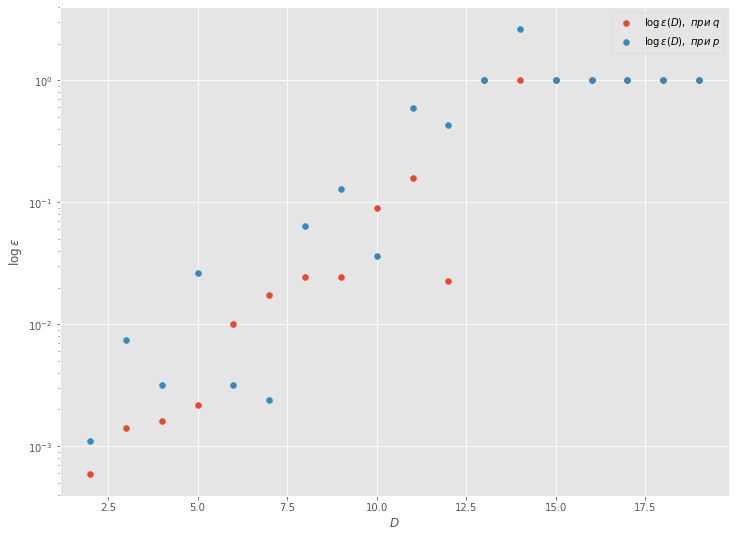

In [10]:
N = 15000
D = np.arange(2, 20)
eps_fq = []
eps_fp = []
for d in D:
    V = getSphereVolumeExact(d)
    eps_q = abs(1 - getSphereVolumeQuasirandom(N, d) / V)
    eps_p = abs(1 - getSphereVolumePseudorandom(N, d) / V)
    eps_fq.append(eps_q)
    eps_fp.append(eps_p)
plt.figure(figsize=(12, 9))
plt.yscale('log')
plt.xlabel(r'$D$')
plt.ylabel(r'$\log \varepsilon$')
plt.scatter(D, eps_fq, label=r'$\log \varepsilon(D), \ при \ q$')
plt.scatter(D, eps_fp, label=r'$\log \varepsilon(D), \ при \ p$')
plt.legend()

Сделайте вывды о работе псевдослучайной и квазислучайной последовательностях. 

Зависит от измерений Большие- одинаковой точностью, малые - метод квази Монте Карло-меньшая ошибка

# Задание 2

## Задание 2.1
Вычислите значение интеграла 
$$
\int d^d\mathbf{r} \frac{e^{-\mathbf{r}^T\mathbf{r}}}{1 + \mathbf{r}^T\mathbf{r}}, \;\mathbf{r} = (r_1, r_2, ..., r_d)
$$
по всему пространству, используя генерацию случайной величины с гауссовой плотностью.
Проведите результаты для $d=1,2,3,4,5$, используя разумной количество точек.
Для $d=1,2$ сравните с ответом, полученным \textit{любым} другим способом.

In [11]:
from scipy import integrate
def phonk(r):
    return 1 / (1 + (r ** 2).sum())
N = 1000000
m, sigma = 0, 1 / np.sqrt(2)
for d in [1, 2, 3, 4, 5]:
    array_r = np.random.normal(m, sigma, size=(N, d)) 
    qw = np.sqrt(np.pi) ** d * np.array([phonk(r) for r in array_r]).sum() / N
    print(f' N = {N} точек при d = {d}: {qw}')
f = lambda x: np.e ** (-x ** 2) / (1 + x ** 2)
print(f'integrate.quad: {integrate.quad(f, -np.inf, np.inf)[0]}')
func = lambda x, y: np.e ** (-x ** 2 - y ** 2) / (1 + x ** 2 + y ** 2)
def integrl(y):
   return integrate.quad(func, -np.inf, np.inf, args=(y))[0]
print(f' integrate.quad: {integrate.quad(lambda x: integrl(x), -np.inf, np.inf)[0]}')

 N = 1000000 точек при d = 1: 1.3430589864648956
 N = 1000000 точек при d = 2: 1.8743178908678084
 N = 1000000 точек при d = 3: 2.698598048520332
 N = 1000000 точек при d = 4: 3.982923723897799
 N = 1000000 точек при d = 5: 6.017195976897837
integrate.quad: 1.3432934216467354
 integrate.quad: 1.873480492462358


## Задание 2.2
Реализуйте функцию, возвращающую выборку случайной величины с плотностью $\omega(x) \propto \sqrt{1-x^2}, x\in[-1,1]$, используя rejection method.

In [12]:
def getSample(N):
    np.random.seed(42)
    w = lambda x: np.sqrt(1 - x ** 2)
    sample = []
    while len(sample) < N:
      x = np.random.uniform(-1, 1, size=1)
      y = np.random.uniform(0, 1, size=1)
      if y[0] < w(x[0]):
        sample.append(x[0])
    return sample

Проверьте правильность, сгенерировав достаточно большой sample, и построив гистограмму.

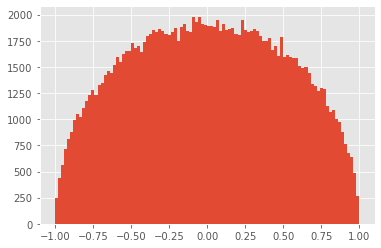

In [13]:
plt.hist(getSample(150000), 100)
plt.show()

# Задание 3

Рассмотрим решетку $n\times n$, в которой каждой ячейке соответствует спин $\sigma_i$ равный $+1$ или $-1$. При этом между соседними ячейками существует энергия взаимодействия
$$
E_i = -J \sigma_i \sigma_j
$$
Тогда энергия каждой ячейки 
$$
E_i = -J \sigma_i \sum_j \sigma_j
$$
где суммирование подразумевается только по соседним с $i$-ой ячейкой.

При нулевой температуре энергитически более выгодным состоянием является состояние, когда все спины одинаково ориентированы. Однако при ненулевой температуре вероятность перехода в более возбужденное состояние пропорциональна $\sim \exp(-\Delta E/ k T)$.

Явное численное моделирование такой системы (модели Изинга) является проблематичным, поскольку количество возможных состояний системы $2^N$, где $N$ - общее число узлов, и уже для двумерной сетки $16\times 16$ это число становится астрономически большим. 

На помощь приходят методы Монте-Карло. Одна из простейших его реализаций (алгоритм Метрополиса — Гастингса):
1. Задаем случайное начальное состояние
2. Выбираем случайную ячейку
3. Переворачиваем её спин и считаем изменение энергии $\delta E$ данной ячейки.
4. Если изменение энергии отрицательное, оставляем спин перевернутым
5. Если изменение энергии положительное, оставляем спин перевернутым с вероятностью $\exp(-\delta E/kT)$
6. Повторяем пункты 2-5 нужное количество раз

Спустя достаточно большое количество повторений устанавливается равновесное состояние. 

Реализуем данный алгоритм: 
1. Задайте начальное случайное расраспределение в виде матрицы из $+1$ и $-1$ размерности $N\times N$:

In [14]:
def getInitialState(N):
    state = np.random.randint(2, size=(N, N))
    state[state == 0] = -1
    return state

2. Напишите функцию, которая для ячейки $(i,j)$ расчитывает изменение её энергии, если изменить её знак. При этом для простоты предполагаем, во-первых, что $J=1$ (на него отнормируем kT), и во-вторых, что элементы находящиеся на верхней и нижней (левой и правой) границах находятся рядом друг с другом (топология тора).  


In [15]:
def getDeltaE(i, j, state):
    N = len(state)
    E = state[i][j] * (state[(i - 1) % N][j] + state[(i + 1) % N][j] + state[i][(j - 1) % N] + state[i][(j + 1) % N])
    dE = float(2 * E)
    return dE

3. Напишите функцию, которая $N^2$ раз для разных случайных $(i,j)$ меняет спин в зависимости от изменения энергии, согласно пунктам 4. и 5. 

In [16]:
def makeFlip(T, state):
    N = len(state)
    i = np.random.randint(0, N, size=1)[0]
    j = np.random.randint(0, N, size=1)[0]
    for _ in range(N ** 2):
      dE = getDeltaE(i, j, state)
      if dE <= 0:
          state[i][j] *= -1
      else:
          dist = np.random.uniform(0, 1)
          if dist <= np.e ** (-dE / T):
              state[i][j] *= -1  
      i = np.random.randint(0, N, size=1)[0]
      j = np.random.randint(0, N, size=1)[0]
    return state

4. Напишите функцию, которая будет рассчитывать значение энергии всей системы (предполагаем $J=1$).

In [17]:
def getEnergy(state):
    N = len(state)
    E = 0
    for i in range(N):
      for j in range(N):
        E_ij = state[i][j] * (state[(i - 1) % N][j] + state[(i + 1) % N][j] + state[i][(j - 1) % N] + state[i][(j + 1) % N])
        E += E_ij
    return float(E)

5. Напишите функцию, которая будет рассчитывать значение намагниченности всей системы $M=\sum \sigma$

In [18]:
def getMagnetization(state):    
    N = len(state)
    M = 0
    for row in state:
        M += row.sum() 
    return float(M)

В следующей ячейке кода зададим начальные параметры: 

**Nt** - количество точек по температуре, 

**N** - линейный размер решетки, 

**eqStep** - количество попыток переворота спина, в течение которых система приводится к равновесному сосотоянию. Обратите внимание, что это число должно увеличиваться пропорционально размеру всей сетки,

**steps** - количество попыток переворота спина, в течение которых рассчитывается значения энергии и намагниченности (нужно для усреднения расчитанных значений по ансамблю состояний, близких к равновесному)

In [19]:
N       = 10         # размер решетки NxN
Nt      = 10         # количество точек температуры
eqSteps = 150        # количество раз выполнения makeFlip для установления равновесия
steps   = 30         # количество раз выполнения makeFlip для усреднения энергии и намагниченности

T = np.linspace(0.5, 5, Nt); 
E, M = np.zeros(Nt), np.zeros(Nt)

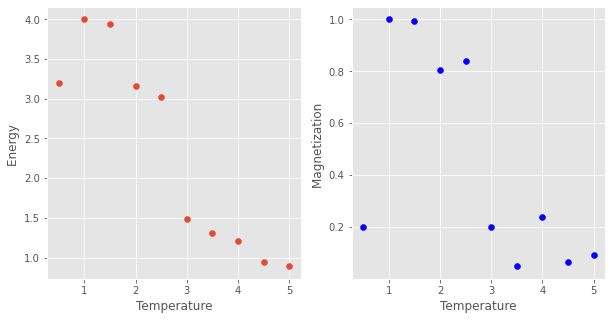

In [20]:
for t in range(Nt):
    print("Complete", t/Nt*100, '%\r', end='')
    
    Esum = Msum = 0
    state = getInitialState(N)
    
    for i in range(eqSteps):         # установление статистического равновесия
        makeFlip(T[t], state)          

    for i in range(steps):           # суммирование по разным состояниям близким к равновеснсому
        makeFlip(T[t], state)          
        Esum += getEnergy(state)       
        Msum += getMagnetization(state) 

    E[t] = Esum / (steps * N * N)
    M[t] = Msum / (steps * N * N)

print("Done              \r", end='')

_, ax = plt.subplots(1,2,figsize=(10, 5));

ax[0].scatter(T, E)
ax[0].set_xlabel("Temperature");
ax[0].set_ylabel("Energy ");

ax[1].scatter(T, abs(M), color = 'blue')
ax[1].set_xlabel("Temperature"); 
ax[1].set_ylabel("Magnetization ");

Интерпретируйте с точки зрения физики полученные графики. Описывают ли они поведение ферромагнетиков и фазовые переходы?

Увеличивая температуру, намагниченность и энергия падают. После точки Кюри, следует фазовый переход, где намагниченность пропадает для E-same. 
При  высоких температурах ферромагнетик = парамагнетику в магнитном поле.

Задайте новое сосотояние системы с достаточно большим $N$ и визуализируйте его думя цветами (например с помощью `plt.scatter`). Примените несколько раз к этому сосотоянию функциию makeFlip с низкой и с высокой температурами. Объясните наблюдаемое

In [21]:
N = 64
state = getInitialState(N)
# YOUR CODE HERE
raise NotImplementedError()

NotImplementedError: 

In [ ]:
plt.figure()
# Write your code here
makeFlip(0.5, state)
# YOUR CODE HERE
raise NotImplementedError()

YOUR ANSWER HERE